In [ ]:
# Data from kaggle.com
# N_Days: Number of days between registration and the earlier of death, transplantation, or study analysis time in 1986
# Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
# Drug: type of drug D-penicillamine or placebo
# Age: age in days
# Sex: M (male) or F (female)
# Ascites: presence of ascites N (No) or Y (Yes)
# Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
# Spiders: presence of spiders N (No) or Y (Yes)
# Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
# Bilirubin: serum bilirubin in [mg/dl]
# Cholesterol: serum cholesterol in [mg/dl]
# Albumin: albumin in [gm/dl]
# Copper: urine copper in [ug/day]
# Alk_Phos: alkaline phosphatase in [U/liter]
# SGOT: SGOT in [U/ml]
# Tryglicerides: triglicerides in [mg/dl]
# Platelets: platelets per cubic [ml/1000]
# Prothrombin: prothrombin time in seconds [s]
# Stage: histologic stage of disease ( 1, 2, or 3 )
# Citation:
# Dickson,E., Grambsch,P., Fleming,T., Fisher,L., and Langworthy,A.. (2023). Cirrhosis Patient Survival Prediction. UCI Machine Learning Repository. https://doi.org/10.24432/C5R02G.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [20]:
df=pd.read_csv('liver_cirrhosis.csv')
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [4]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [6]:
df.shape

(25000, 19)

In [18]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [22]:
df_s=df[['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin','Stage','Sex']]
df_s.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Sex
0,2221,18499,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,F
1,1230,19724,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,M
2,4184,11839,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,F
3,2090,16467,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2,F
4,2105,21699,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1,F


In [23]:
X = df_s.iloc[:, :-2]
y = df_s.iloc[:, -2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
clf = DecisionTreeClassifier(max_depth=2) 
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [25]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

Accuracy: 0.5552
              precision    recall  f1-score   support

           1       0.51      0.57      0.54      1657
           2       0.50      0.59      0.54      1697
           3       0.72      0.51      0.60      1646

    accuracy                           0.56      5000
   macro avg       0.58      0.55      0.56      5000
weighted avg       0.58      0.56      0.56      5000



In [26]:
scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation scores:", scores.mean())

Cross-validation scores: 0.54724


In [29]:
importance = clf.feature_importances_
for i, j in enumerate(importance):
    print(f'Feature: {df_s.columns[i]}, Score: {j:.2f}')

Feature: N_Days, Score: 0.40
Feature: Age, Score: 0.00
Feature: Bilirubin, Score: 0.00
Feature: Cholesterol, Score: 0.00
Feature: Albumin, Score: 0.00
Feature: Copper, Score: 0.00
Feature: Alk_Phos, Score: 0.00
Feature: SGOT, Score: 0.00
Feature: Tryglicerides, Score: 0.00
Feature: Platelets, Score: 0.00
Feature: Prothrombin, Score: 0.60


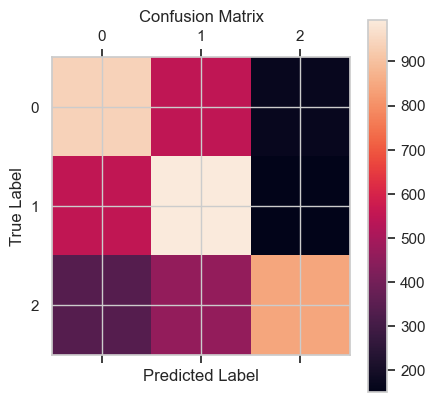

In [30]:
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()